Copyright 2022 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [ ]:
from jax import numpy as jnp
from jax import grad

from matplotlib import pyplot as plt

from sobolev import chebyshev
from sobolev import sobolev


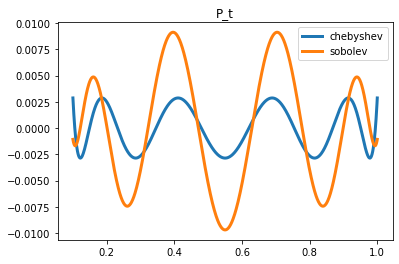

In [ ]:
  xx = jnp.linspace(0.1, 1, 1000)
  yy = chebyshev.eval_chebyt(10, xx, 0.1, 1., normalization='residual')
  
  yy_sobolev = sobolev.eval_sobolev_chebyt(10, xx, 0.1, 1.)
  
  plt.title("P_t")
  plt.plot(xx, yy, lw=3, label='chebyshev')
  plt.plot(xx, yy_sobolev, lw=3, label='sobolev')
  plt.legend()
  plt.show()

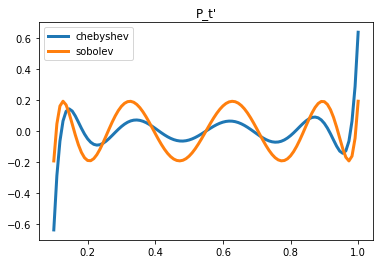

In [ ]:
  xx = jnp.linspace(0.1, 1, 100)
  yy = [grad(chebyshev.eval_chebyt, argnums=1)(10, x, 0.1, 1., normalization='residual') for x in xx]
  
  yy_sobolev = [grad(sobolev.eval_sobolev_chebyt, argnums=1)(10, x, 0.1, 1.) for x in xx]

  plt.title("P_t'")
  plt.plot(xx, yy, lw=3, label='chebyshev')
  plt.plot(xx, yy_sobolev, lw=3, label='sobolev')
  plt.legend()
  plt.show()

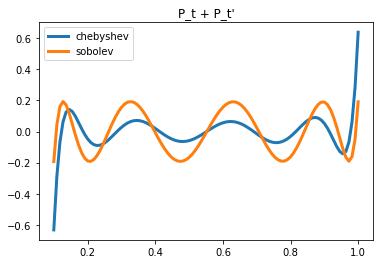

In [ ]:
  xx = jnp.linspace(0.1, 1, 100)
  yy = [chebyshev.eval_chebyt(10, x, 0.1, 1., normalization='residual') + grad(chebyshev.eval_chebyt, argnums=1)(10, x, 0.1, 1., normalization='residual') for x in xx]
  
  yy_sobolev = [sobolev.eval_sobolev_chebyt(10, x, 0.1, 1.) + grad(sobolev.eval_sobolev_chebyt, argnums=1)(10, x, 0.1, 1.) for x in xx]

  plt.title("P_t + P_t'")
  plt.plot(xx, yy, lw=3, label='chebyshev')
  plt.plot(xx, yy_sobolev, lw=3, label='sobolev')
  plt.legend()
  plt.show()